# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [3]:
#ваш код
import pandas as pd

df = pd.read_csv('Advertising.csv')

print(df.head())
print(df.info())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [4]:
#ваш код
# Пропуски
missing_count = df.isnull().sum()

print("Пропусков в столбце:")
print(missing_count)

Пропусков в столбце:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [5]:
#ваш код
import numpy as np

# Целевая переменная (продажи) и предикторы (затраты на рекламу в разных каналах)
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

# Проверка - размеры массивов
print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")

Размер X: (200, 3)
Размер y: (200,)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
import numpy as np
X_plus_1 = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])


# Проверка - размеры массивов
print(f"Размер X: {X_plus_1.shape}")
print(f"Размер y: {y.shape}")
print(X_plus_1[:5])

Размер X: (200, 4)
Размер y: (200,)
[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [7]:
X_normal = X_plus_1 / np.sqrt(np.sum(np.square(X_plus_1), axis=0))
print(f"Размер X: {X_normal.shape}")
print(X_normal[:5])

Размер X: (200, 4)
[[0.07071068 0.09561706 0.09692057 0.13052034]
 [0.07071068 0.01849178 0.10076663 0.08506456]
 [0.07071068 0.00714739 0.11768927 0.13070895]
 [0.07071068 0.06295517 0.1058947  0.11033873]
 [0.07071068 0.07513066 0.02769159 0.11015011]]


**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [8]:
#ваш код
# Инициализация вектора весов и остатков (веса изначально приравняли к нулю)
w_cdc = np.zeros(X_normal.shape[1])
r = y.copy()

# Координатный спуск
num_iterations = 1000 # Кол-во итераций

for iteration in range(num_iterations):
    for j in range(X_normal.shape[1]):

        r = r + X_normal[:, j] * w_cdc[j] # Добавили вклад веса w признака Х в остатки r

        w_cdc[j] = np.dot(X_normal[:, j], r) # Обновили вес w = X * r

        r = r - X_normal[:, j] * w_cdc[j] # Обновили остатки (из r вычли новый вклад признака X)

w_cdc_result = w_cdc.copy()
print("Веса в модели линейной регрессии:", w_cdc_result)

Веса в модели линейной регрессии: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_normal, y)

print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
#ваш код
# Средние и стандартные отклонения
means = np.mean(X_normal, axis=0)
stds = np.std(X_normal, axis=0)

# Масштабирование
X_scaled = (X_normal - means) / stds

print("Средние:", np.mean(X_scaled, axis=0))
print("Ст.отклонения:", np.std(X_scaled, axis=0))

Средние: [ 1.00000000e+00 -3.55271368e-17 -2.22044605e-16 -1.24344979e-16]
Ст.отклонения: [0. 1. 1. 1.]


**Добавим единичный столбец**

In [30]:
# X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# Закомментировала добавление единичного столбца, т.к. мы его добавили выше. Если добавить ещё один, то получаем ошибку (ValueError: shapes (200, 5) and (4,) not aligned): добавляется лишний столбец единиц, и размеры матриц перестают совпадать (размер Х получается 200 х 5, вектор w имеет длину 4).
# Сравнение размеров массивов для дальнейших расчётов:
print(f"Размер y: {y.shape}")
print(f"Размер w_cdc_result: {w_cdc_result.shape}")
print(f"Размер X_scaled: {X_scaled.shape}")
print("Первые строки X_scaled:", X_scaled[:5])
print("Первые значения y:", y[:5])
print("Веса w_cdc_result:", w_cdc_result)

Размер y: (200,)
Размер w_cdc_result: (4,)
Размер X_scaled: (200, 4)
Первые строки X_scaled: [[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]
Первые значения y: [22.1 10.4  9.3 18.5 12.9]
Веса w_cdc_result: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [50]:
#ваш код
# Cреднеквадратичная ошибка (MSE), где y_true - истинные значения y, y_pred_cdc - предсказание на основе рассчитанных выше весов.

y_true = y
y_pred_cdc = np.dot(X_normal, w_cdc_result)

def mse_error(y_true, y_pred):

    mse = np.mean((y_true - y_pred_cdc) ** 2)
    return mse

mse_function = mse_error(y_true, y_pred_cdc)

# Проверка (расчёт по формуле)
mse_formula = (1 / len(y_true)) * np.sum((y_true - y_pred_cdc) ** 2)

print(f"MSE (функция): {mse_function}")
print(f"MSE (проверка): {mse_formula}")

# Сравнение с MAE
mae_cdc = np.mean(np.abs(y_true - y_pred_cdc))
print(f"MAE (координатный спуск): {mae_cdc}")

MSE (функция): 2.784126314510936
MSE (проверка): 2.784126314510936
MAE (координатный спуск): 1.2520112296870678


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [32]:
#ваш код
# Наивный прогноз - предположение, что целевая переменная равна среднему значению
naive = np.mean(y)  # Среднее
print("Наивный прогноз (среднее):", naive)

# Cреднеквадратичная ошибка MSE
mse_naive = mse_error(y, np.full_like(y, naive))
print(f"MSE для наивного прогноза: {mse_naive}")

Наивный прогноз (среднее): 14.0225
MSE для наивного прогноза: 2.784126314510936


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [33]:
#ваш код
# Функция lin_pred, прогнозируемый y = X @ w
def lin_pred(X, w):
    return np.dot(X, w)

# Смотрим на примере полученных выше масштабированной матрицы X_scaled и весов w_cdc_result
y_lin_pred = lin_pred(X_scaled, w_cdc_result)

# Вывод 5 предсказаний
print("Предсказания:", y_lin_pred[:5])

# Проверка корректности (считаем MSE)
mse_lin_pred = mse_error(y, y_pred_cdc)
print("MSE:", mse_lin_pred)

Предсказания: [219.56484616 -11.05755963 -14.0094509  136.13404966  22.38627367]
MSE: 2.784126314510936


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла)
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [45]:
#ваш код
# Cтохастический градиентный спуск (SGD1)
# Функция принимает на вход аргументы:

X_sdg = X_scaled  # Масштабированная матрица X

y_sdg = y  # Таргет

w_sdg = np.zeros(X_sdg.shape[1])  # Начальные веса (на входе равны 0)

train_ind = np.random.randint(0, X_sdg.shape[0])  # Случайный объект из данных

eta = 0.01  # Шаг градиентного спуска / шаг обучения (learning rate)

# Cтохастический градиентный спуск

def stoch_grad_step(X, y, w, train_ind, eta):

    y_pred_sdg = np.dot(X[train_ind], w) # Предсказание для случайного объекта

    error_sdg = y_pred_sdg - y[train_ind] # Градиентное обновление

    gradient = 2 * X[train_ind] * error_sdg # Градиент для весов объекта

    w_sdg = w - eta * gradient    # Обновление веса

    return w_sdg

w_sdg_new = stoch_grad_step(X_sdg, y_sdg, w_sdg, train_ind, eta) # Выполнение шага SGD

print("Вектор обновленных весов:", w_sdg_new)

Вектор обновленных весов: [ 0.322       0.50254613 -0.20359758  0.09554418]


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [52]:
# ваш код
# Cтохастический градиентный спуск (SGD2, полный)

# Параметры на входе:
X_sgd = X_scaled  # Масштабированная матрица X
y_sgd = y  # Таргет
w_sgd_init = np.zeros(X_sgd.shape[1])  # Начальные нулевые веса
eta_sgd = 0.01  # Шаг обучения
max_iter_sgd = 1000  # Макс. количество итераций

#Функция SGD
def stochastic_gradient_descent(X_sgd, y_sgd, w_sgd_init, eta_sgd, max_iter_sgd):

    w_sgd_current = w_sgd_init.copy()  # Вектор весов на входе (инициализация)

    mse_sgd_errors = []  # Список для записи ошибок

    for iter_num in range(max_iter_sgd):  # Основной цикл

        train_ind_sgd = np.random.randint(0, X_sgd.shape[0]) # Случайный объект

        w_sgd_current = stoch_grad_step(X_sgd, y_sgd, w_sgd_current, train_ind_sgd, eta_sgd) # 1 шаг гр. спуска

        y_sgd_pred = np.dot(X_sgd, w_sgd_current)  # Предсказания для выборки

        mse_sgd = np.mean((y_sgd - y_sgd_pred) ** 2)  # MSE выборки

        mse_sgd_errors.append(mse_sgd)  # Сохранение MSE

    return w_sgd_current, mse_sgd_errors

# Запуск функции
w_sgd_result, mse_sgd_errors = stochastic_gradient_descent(X_sgd, y_sgd, w_sgd_init, eta_sgd, max_iter_sgd)

# Расчёт и проверка MSE
mse_min = min(mse_sgd_errors)  # Наименьшее значение MSE
mse_max = max(mse_sgd_errors)  # Наибольшее значение MSE
mse_mean = sum(mse_sgd_errors) / len(mse_sgd_errors)  # Среднее значение MSE

# Расчёт и проверка MAE
y_pred_sgd = np.dot(X_scaled, w_sgd_result)  # Предсказание на основе итоговых весов
mae_sgd = np.mean(np.abs(y_sgd - y_pred_sgd))

# Результаты
print("Новый вектор весов:", w_sgd_result)
print()
print(f"MAE (SGD): {mae_sgd}")
print(f"Наименьшее значение MSE: {mse_min}")
print(f"Наибольшее значение MSE: {mse_max}")
print(f"Среднее значение MSE: {mse_mean}")
print("Вектор ошибок (список MSE):", mse_sgd_errors)

Новый вектор весов: [13.79559089  3.62526761  3.02948259  0.12695945]

MAE (SGD): 1.332190255113768
Наименьшее значение MSE: 2.7895724505714896
Наибольшее значение MSE: 222.38081872508556
Среднее значение MSE: 9.2134624246059
Вектор ошибок (список MSE): [222.38081872508556, 214.58098441051493, 207.71608239020424, 202.07581906308457, 198.68830085336774, 193.27902968291247, 181.5506129133897, 180.45440893954566, 168.12197879055302, 167.63184303105433, 161.23955658008515, 150.85479233542378, 138.6308994028912, 129.30276588683765, 122.98492154572847, 119.25899091189689, 118.0710885262113, 116.24132941026183, 115.36665813308942, 113.28569289200004, 111.1328214601371, 106.76095675921698, 105.47849973897596, 105.09350304173385, 97.8661686473263, 96.71646639429594, 94.77167734359942, 91.4570450564242, 88.42573093215931, 87.50057152670848, 81.7057511482907, 81.06413622336932, 80.21040021180346, 78.0744947806769, 78.06808713058258, 77.99217878343654, 71.05749701121495, 66.37735311804806, 59.0406

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

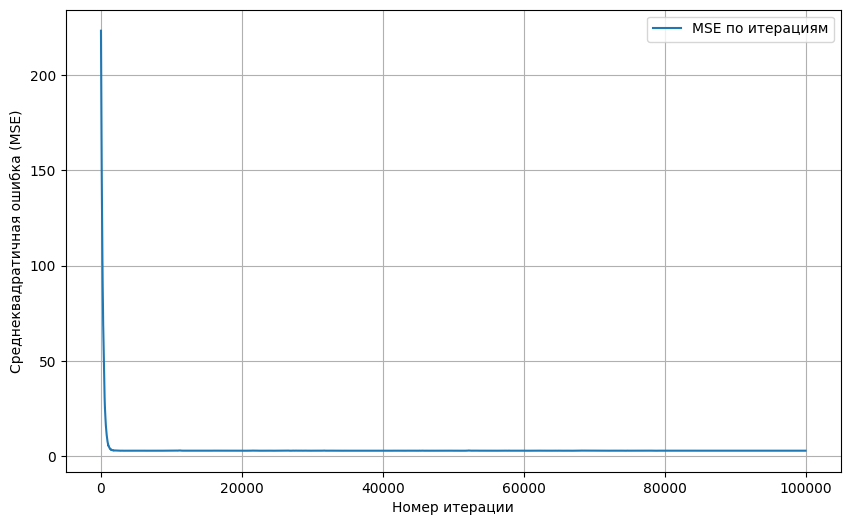

Новый вектор весов: [14.10002296  3.95155679  2.79166298  0.0431923 ]
MSE на последней итерации: 2.7957208658982324


In [54]:
# ваш код
# График зависимости ошибки от номера итерации

import matplotlib.pyplot as plt

# На входе
X_sgd = X_scaled  # Масштабированная матрица X
y_sgd = y  # Таргет
w_sgd_init = np.zeros(X_sgd.shape[1])  # Начальные нулевые веса
eta_sgd = 0.001  # Шаг обучения уменьшила с 0.01 до 0.001, т.к. так получается чуть меньше MSE
max_iter_sgd = 10**5  # Макс. количество итераций

# Запуск функции SGD
w_sgd_result, mse_sgd_errors = stochastic_gradient_descent(X_sgd, y_sgd, w_sgd_init, eta_sgd, max_iter_sgd)

# График
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_sgd_errors)), mse_sgd_errors, label='MSE по итерациям')
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Результат
print("Новый вектор весов:", w_sgd_result)
print("MSE на последней итерации:", mse_sgd_errors[-1])

**Выведите вектор весов, к которому сошелся метод.**

In [64]:
# ваш код

print("Метод сошёлся к вектору:", w_sgd_result)

Метод сошёлся к вектору: [14.10002296  3.95155679  2.79166298  0.0431923 ]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [63]:
# ваш код

print("MSE на последней итерации:", mse_sgd_errors[-1])
print()
print("В целом мы видим, что стохастический градиентный спуск и координатный градиентый спуск показали сопоставимые результаты, их средние квадратичные ошибки (MSE) имеют почти одинаковые значения.")
print("Однако координатный спуск дал немного меньшую ожидаемую величину отклонения - меньшую среднюю абсолютную ошибку (MAE): CDC = 1.25, SGD = 1.33. Это может говорить о лучшей устойчивости модели CDC (координатного спуска) к выбросам.")

MSE на последней итерации: 2.7957208658982324

В целом мы видим, что стохастический градиентный спуск и координатный градиентый спуск показали сопоставимые результы, их средние квадратичные ошибки (MSE) имеют почти одинаковые значения.
Однако координатный спуск дал немного меньшую ожидаемую величину отклонения - меньшую среднюю абсолютную ошибку (MAE): CDC = 1.25, SGD = 1.33. Это может говорить о лучшей устойчивости модели CDC (координатного спуска) к выбросам.
